# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-vectores_calculo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de Vectores y Cálculo

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Conjuntos y tuplas

Creación y manipulación básica de listas:

In [2]:
#Lista de componentes del vector posición
r=[1,0,3]
#Lista de componentes del vector velocidad
v=[0,-1,0]
#Lista de componentes del vector de estado
X=r+v
print(f"X = {X}")

X = [1, 0, 3, 0, -1, 0]


Función sobre una lista:

In [3]:
def f(x):
    from math import sin
    y=sin(x)/x
    return y

valores_de_x=[1.0,2.0,3.0]
valores_de_f=[]
for x in valores_de_x:
    valores_de_f+=[f(x)]

print(f"valores de f = {valores_de_f}")

valores de f = [0.8414709848078965, 0.45464871341284085, 0.0470400026866224]


### Vectores

Vectores de `numpy` y operaciones vectoriales:

In [4]:
#Definimos los vectores
from numpy import array
A=array([1.0,0.0,2.0])
B=array([0.0,1.0,3.0])

#Calculamos el producto escalar y vectorial
from numpy import dot
ApuntoB=dot(A,B)

#El ángulo entre los vectores
from numpy import arccos
from numpy.linalg import norm
anguloAB=arccos(ApuntoB/(norm(A)*norm(B)))

from numpy import pi
print(f"AnguloAB = {anguloAB*180/pi} grados")

AnguloAB = 31.948059431330062 grados


Vectores usando `SPICE`:

In [5]:
from numpy import array
from spiceypy import vdot,vcrss
A=array([2.0,2.0,1.0])
B=array([0.0,-1.0,0.0])
C=array([0.0,0.0,2.0])
AxBxC=vdot(A,B)*C-vdot(A,C)*B

print(f"A x (B x C) = {AxBxC}")

A x (B x C) = [-0.  2. -4.]


Propiedad cíclica de los vectores:

In [6]:
from numpy import array
from spiceypy import vnorm,vdot,vcrss
A=array([2.0,2.0,1.0])
B=array([0.0,-1.0,0.0])
C=array([0.0,0.0,2.0])

ABC=vdot(A,vcrss(B,C))
CAB=vdot(C,vcrss(A,B))
BCA=vdot(B,vcrss(C,A))

print(f"A.(BxC) = {ABC}")
print(f"C.(AxB) = {CAB}")
print(f"B.(CxA) = {BCA}")

A.(BxC) = -4.0
C.(AxB) = -4.0
B.(CxA) = -4.0


### Funciones

Creación de una función:

In [7]:
def U(x,y,z,k=1,n=-1):
    r=(x**2+y**2+z**2)**0.5
    return k*r**n

print(f"U(1.0,2.0,0.0) con k = 1 y n = -1 (valores por defecto) = {U(1.0,2.0,0.0)}")
print(f"U(1.0,2.0,0.0) con k = 6.67e-11 y n = -2 = {U(1.0,2.0,0.0,k=6.67e-11,n=-2)}")

U(1.0,2.0,0.0) con k = 1 y n = -1 (valores por defecto) = 0.4472135954999579
U(1.0,2.0,0.0) con k = 6.67e-11 y n = -2 = 1.334e-11


Código alternativo:

In [8]:
def U(*variables,**opciones):
    x,y,z=variables
    r=(x**2+y**2+z**2)**0.5
    return opciones["k"]*r**opciones["n"]

var=1.0,2.0,0.0
opc=dict(k=6.67e-11,n=-2)
U(*var,**opc)

1.334e-11

Funciones lambda:

In [9]:
def U(x,y,z,k=1,n=-1):
    r=(x**2+y**2+z**2)**0.5
    return k*r**n

y=1.0
z=1.0
k=1
n=-2
U_x=lambda x:U(x,y,z,k,n)

print(f"Ux(0.0) = {U_x(0.0)}")

Ux(0.0) = 0.49999999999999994


### Derivada

Uso de la función `derivative`: 

In [10]:
def f(t):
    from math import sin
    return sin(t)/t

#Valor de la variable independiente donde queremos la derivada
t=2.0

from scipy.misc import derivative

#Primera derivada usando un dx=0.01 y 3 puntos
dfdt=derivative(f,t,dx=1e-2,n=1,order=3)

#Segunda derivada en t
d2fdt2=derivative(f,t,dx=1e-2,n=2,order=5)

from math import sin,cos
print(f"dfdt : Numérica = {dfdt}, Exacta = {cos(t)/t-sin(t)/t**2}")
print(f"d2fdt2 : Numérica = {d2fdt2}, Exacta = {-sin(t)/t-cos(t)/t**2-cos(t)/t**2+2*sin(t)/t**3}")

dfdt : Numérica = -0.4353938258295498, Exacta = -0.43539777497999166
d2fdt2 : Numérica = -0.019250938436687903, Exacta = -0.01925093843284925


/tmp/ipykernel_52109/3851137043.py:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dfdt=derivative(f,t,dx=1e-2,n=1,order=3)
/tmp/ipykernel_52109/3851137043.py:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d2fdt2=derivative(f,t,dx=1e-2,n=2,order=5)


Derivada parcial:

In [11]:
def f(x,y,z):
    from math import sin
    return sin(x*y*z)/(x*y*z)

def partial_derivative_x(f,x,y,z,**opciones):
    f_solo_x=lambda x:f(x,y,z)
    dfdx=derivative(f_solo_x,x,**opciones)
    return dfdx

x=1.0
y=2.0
z=3.0
dfdx=partial_derivative_x(f,x,y,z,dx=0.01)

print(f"dfdx: Numérica = {dfdx}, Exacta = {cos(x*y*z)/x-sin(x*y*z)/(x**2*y*z)}")

dfdx: Numérica = 1.0061803563982654, Exacta = 1.006739536350187


/tmp/ipykernel_52109/3968733900.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dfdx=derivative(f_solo_x,x,**opciones)


## Integral

Integral numérica por caudraturas:

In [12]:
#El integrando debe definirse como una rutina
def F(x,k=1):
    return -k*x

from scipy.integrate import quad
k=0.1
x0=1.0
x1=5.0
integral=quad(F,x0,x1,args=(k,))

print(f"Integral: Numérica = {integral}, Exacta = {-0.5*(k*x1**2-k**x0**2)}")

Integral: Numérica = (-1.2, 1.3322676295501878e-14), Exacta = -1.2


## Ecuaciones diferenciales

Solución a la ecuación diferencial del oscilador armónico simple:

In [16]:
def ode_simple(Y,t,k=1):
    f=[0,0]
    f[0]=Y[1]
    f[1]=-k*Y[0]
    return f

from numpy import array,linspace
k=1.5
Yos=array([1.0,0.0])
ts=array([0.0,1.0,2.0,3.0,4.0,5.0])
from scipy.integrate import odeint
Ys=odeint(ode_simple,Yos,ts,args=(k,))

print(f"Solución, Ys =\n{Ys}")

Solución, Ys =
[[ 1.          0.        ]
 [ 0.33918602 -1.15214115]
 [-0.76990562 -0.78158038]
 [-0.86146852  0.6219388 ]
 [ 0.18550948  1.20348632]
 [ 0.987313    0.1944726 ]]


Gráfico de la solución:

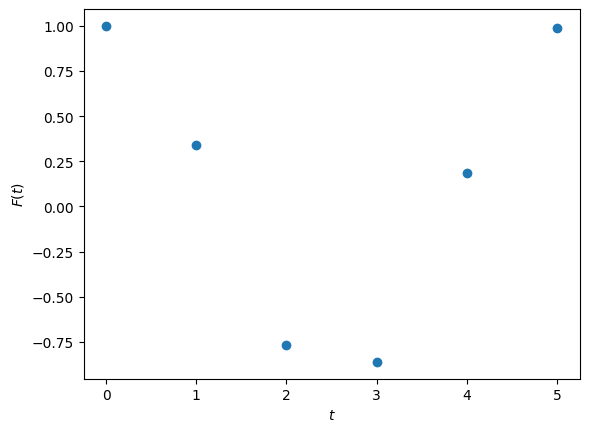

In [17]:
import matplotlib.pyplot as plt

#Extraemos los valores de la función F
Fs=Ys[:,0]

plt.figure();
plt.plot(ts,Fs,marker='o',linewidth=0);

#--hide--
plt.xlabel("$t$");
plt.ylabel("$F(t)$");

Alternativa usando `solve_ivp`:

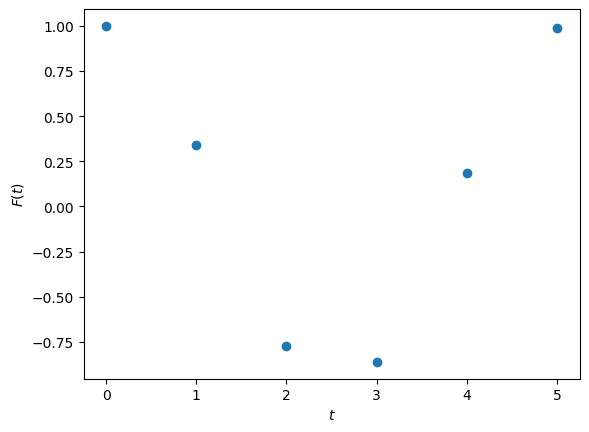

In [21]:
from scipy.integrate import solve_ivp
solucion=solve_ivp(fun=lambda t,Y:ode_simple(Y,t,k),t_span=[ts[0],ts[-1]],y0=Yos,t_eval=ts)

#Extraemos los valores de la función F
Fs=solucion.y[0]

plt.figure();
plt.plot(ts,Fs,marker='o',linewidth=0);

#--hide--
plt.xlabel("$t$");
plt.ylabel("$F(t)$");

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)